In [2]:
import pandas as pd
import numpy as np
from utils import *
from data_processing import *
import matplotlib.pyplot as plt
import pathlib

In [20]:
import biosppy
import pyhrv.tools as tools

ecg_signal = load_ecg("train_ecg_00001.mat")
#ecg_signal = load_ecg("train_ecg_02544.mat")

signal, rpeaks, _, templates = biosppy.signals.ecg.ecg(ecg_signal, show=False, sampling_rate=300)[1:5]

nni = tools.nn_intervals(rpeaks)

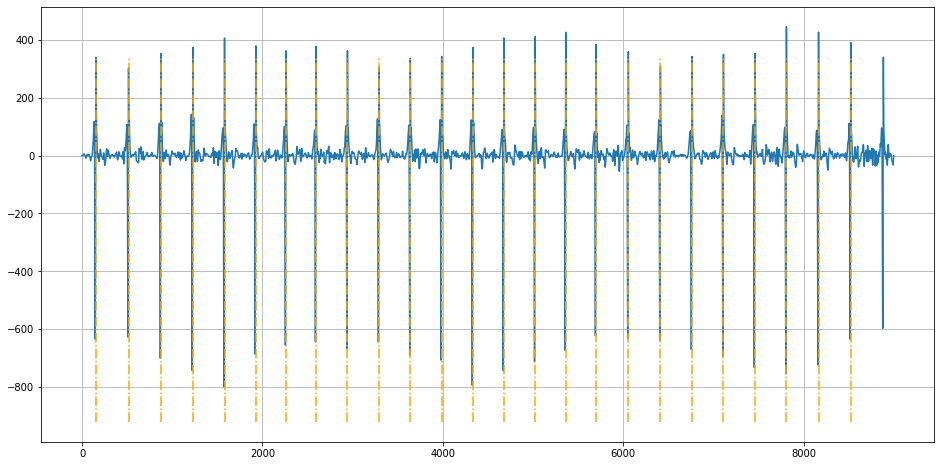

In [21]:
plt.figure(1, (16,8))

plt.plot(signal)

# plot R peaks
plt.vlines(rpeaks, linestyles="dashdot", ymin=ecg_signal.min(), ymax=ecg_signal.max(), colors="orange")

plt.grid()

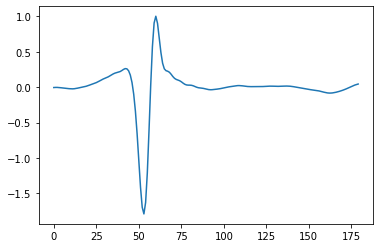

In [22]:
mean_template = np.mean(templates[13:], axis=0)
mean_template = mean_template/mean_template.max() # normalize
plt.plot(mean_template)

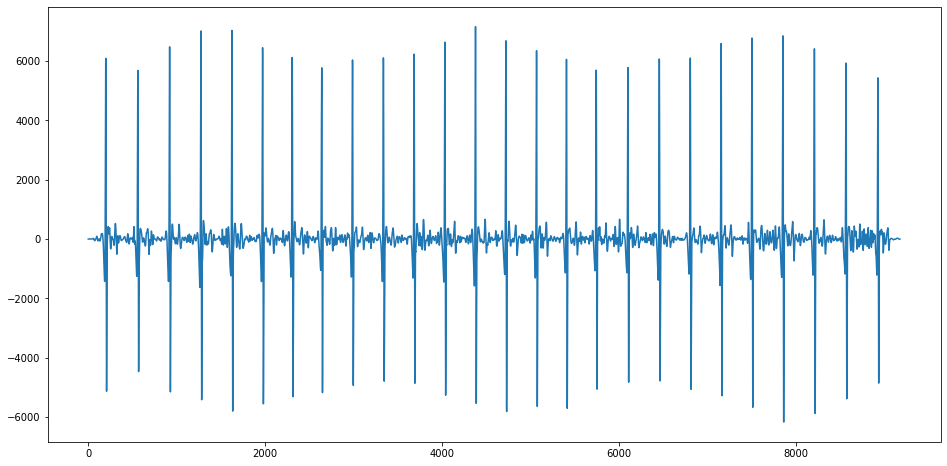

In [23]:
import scipy
plt.figure(1, (16,8))
plt.plot(scipy.signal.oaconvolve(signal,mean_template, mode="full"))

(array([[1.45579556e+00, 4.34367886e-01, 2.28394613e-01, ...,
         1.14669217e+00, 9.33870537e-01, 3.00577668e+00],
        [6.95541356e+00, 5.90708162e+00, 2.63875612e-01, ...,
         1.21087928e+00, 3.03081907e+00, 5.39476974e+00],
        [3.32555683e+01, 2.55229165e+01, 9.20513069e-01, ...,
         4.62389873e+01, 3.34587458e+00, 7.91074033e+00],
        ...,
        [6.57176380e-14, 1.84646698e-12, 1.03988438e-09, ...,
         4.54060450e-14, 4.33295003e-13, 4.74041645e-13],
        [2.62113752e-14, 1.39673234e-12, 1.02138054e-09, ...,
         1.40765091e-14, 4.37096425e-13, 4.56618901e-13],
        [1.11201339e-14, 6.88985943e-13, 5.07884404e-10, ...,
         2.97931056e-15, 2.10296944e-13, 3.01423930e-13]]),
 array([  0.      ,   1.171875,   2.34375 ,   3.515625,   4.6875  ,
          5.859375,   7.03125 ,   8.203125,   9.375   ,  10.546875,
         11.71875 ,  12.890625,  14.0625  ,  15.234375,  16.40625 ,
         17.578125,  18.75    ,  19.921875,  21.09375 ,  22.2

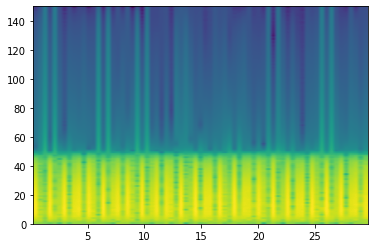

In [24]:
plt.specgram(signal, Fs=300)

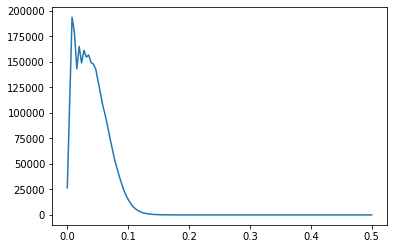

In [51]:
psd_f, psd = scipy.signal.welch(ecg_signal)# power spectral density
plt.plot(psd_f, psd)

In [52]:
LF = [0.05, 0.15] # low frequency band
HF = [0.15, 0.4] # high frequency band

In [54]:
psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]

In [56]:
psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

In [58]:
LF_power = np.trapz(psd_lf, psd_f_lf)
HF_power = np.trapz(psd_hf, psd_f_hf)

In [59]:
LF_power

3384.152152776718

In [60]:
HF_power

3.2429114799015224

In [69]:
def calculate_spectral_powers(signal: np.array, LF: np.array = [0.05, 0.15], HF: np.array = [0.15, 0.4]):
    psd_f, psd = scipy.signal.welch(signal) # power spectral density

    psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
    psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]
    
    psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
    psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

    total_power = np.trapz(psd, psd_f)

    LF_power = np.trapz(psd_lf, psd_f_lf) # low frequency band
    HF_power = np.trapz(psd_hf, psd_f_hf) # high frequency band

    return LF_power/total_power, HF_power/total_power, LF_power/HF_power

In [70]:
calculate_spectral_powers(ecg_signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)

In [71]:
calculate_spectral_powers(signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)